# The scikit-learn Python Library 

[Official Documentation](https://scikit-learn.org/stable/)
***

## Overview

***

https://medium.com/district-data-labs/an-introduction-to-machine-learning-with-python-92bcaf651ac4

basic intro links on scikit: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets
### Machine Learning


Supervised vs Unsupervised - iris data set https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html

### Features of scikit-learn

Classification and Regression are examples of Supervised Learning
RandomForest - classification, regression

Decision Tree - classification, regression

SVC - classification

KNN - classification

Lasso - regression

Gradiant Bossing - classification

Multiple Linear - regression


**When to use each**
https://towardsdatascience.com/how-to-master-scikit-learn-for-data-science-c29214ec25b0

- What is Scikit-Learn
- Who uses it
- Why is it used
- What are the best uses cases
- What is the key functionality
- Examples of using key functionality


#### https://arxiv.org/pdf/1309.0238.pdf is API design for machine learning software: experiences from the scikit-learn project Cornell paper

https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html

Consistency: All objects share a common interface drawn from a limited set of methods, with consistent documentation.

Inspection: All specified parameter values are exposed as public attributes.

Limited object hierarchy: Only algorithms are represented by Python classes; datasets are represented in standard formats (NumPy arrays, Pandas DataFrames, SciPy sparse matrices) and parameter names use standard Python strings.

Composition: Many machine learning tasks can be expressed as sequences of more fundamental algorithms, and Scikit-Learn makes use of this wherever possible.

Sensible defaults: When models require user-specified parameters, the library defines an appropriate default value.


three complementary interfaces: an **estimator** (and pipelines) interface for building and fitting models, a **predictor** interface for making predictions and a **transformer** interface
for converting data. 

http://www.mostafa.rocks/2017/04/what-is-difference-between-estimators.html: What is the difference between estimators vs transformers vs predictors in sklearn? and https://stackoverflow.com/questions/54899647/what-is-the-difference-between-transformer-and-estimator-in-sklearn

You can combine building blocks of estimators, transformers and predictors as a pipeline in sklearn. This allows developers to use multiple estimators from a sequence of transformers followed by a final estimator or predictor. This concept is called composition in Machine Learning....the x and y details of fit()

Data Representation, Estimators, Predictors



Wiki - Scikit-learn (formerly scikits.learn and also known as sklearn) is a free software machine learning library for the Python programming language.[3] It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.


supervised vs unsupervised learning

**hyperparameters**


![Choosing the right estimator](https://scikit-learn.org/stable/_static/ml_map.png)
this is the algorithm/estimator cheat sheet

https://medium.com/district-data-labs/an-introduction-to-machine-learning-with-python-92bcaf651ac4

https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html

from other nb: 
#### A note on  Classification Alogorithims versus Regression Algorithms 

Classification refers to the task of giving a machine learning algorithm features, and having the algorithm put the instances/data points into one of many discrete classes. Classes are categorical in nature, it isn't possible for an instance to be classified as partially one class and partially another. A classic example of a classification task is classifying emails as either "spam" or "not spam" - there's no "a bit spammy" email.

There is an important difference between classification and regression problems.-  Fundamentally, classification is about predicting a label and regression is about predicting a quantity.
https://machinelearningmastery.com/classification-versus-regression-in-machine-learning/

Regressions are done when the output of the machine learning model is a real value or a continuous value. Such an example of these continuous values would be "weight" or "length". An example of a regression task is predicting the age of a person based off of features like height, weight, income, etc.








## Application
***

### Import necessary packages

In [1]:
# Packages

# Numerical arrays.
import numpy as np

# Data frames.
import pandas as pd

# Plotting.
import matplotlib.pyplot as plt

# Fancier, statistical plots.
import seaborn as sns

# 
from sklearn.model_selection import train_test_split

In [2]:

from sklearn import datasets

In [3]:
# Standard plot size.
plt.rcParams['figure.figsize'] = (15, 10)

# Standard colour scheme.
plt.style.use('ggplot')

%matplotlib inline
randomstate = 1 #Provides consistent random data for training and testing. Set to 'None' if not needed

### Selection of Dataset

bit about iris here: https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html

review and structure

datasets available on scikit learn and others: https://scikit-learn.org/stable/datasets.html toy datasets preinstalled

**see 2021 diabetes diet good** - run it and make some small observations, maybe do a pairplot

In [4]:
from sklearn.datasets import load_iris  #have to import in the indivdual libraries for datasets

# Load the iris data set from a URL.
df = load_iris(as_frame = True)['frame']

In [5]:
# Have a look at the data.
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
# Load the iris data set from a URL.
df = pd.read_csv("datasets/iris.csv")

In [7]:
# Have a look at the data.
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [8]:
# Summary statistics.
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Visualise

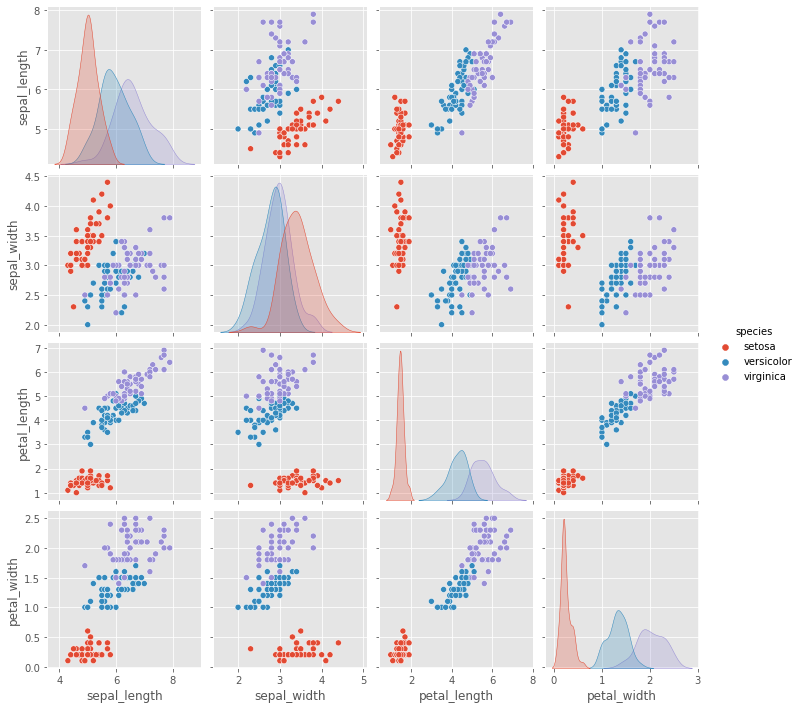

In [9]:
# Scatter plots and kdes.
sns.pairplot(df, hue='species');

### Train and Split

train and test the data **2021 iris loan**

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

https://scikit-learn.org/stable/tutorial/basic/tutorial.html: Training set and testing set

Machine learning is about learning some properties of a data set and then testing those properties against another data set. A common practice in machine learning is to evaluate an algorithm by splitting a data set into two. We call one of those sets the training set, on which we learn some properties; we call the other set the testing set, on which we test the learned properties.

In [10]:
# Split the data frame in two.
train, test = mod.train_test_split(df)

NameError: name 'mod' is not defined

In [ ]:
# Show some training data.
train.head()

In [ ]:
# The indices of the train array.
train.index

In [ ]:
# Show some testing data.
test.head()

In [ ]:
test.index.size

#### Visualise: Test Train Split

In [ ]:
# Segregate the training data.
setos = train[train['species'] == 'setosa']
versi = train[train['species'] == 'versicolor']
virgi = train[train['species'] == 'virginica']

# New plot.
fig, ax = plt.subplots()

# Scatter plots for training data.
ax.scatter(setos['petal_width'], setos['sepal_length'], marker='o', label='Setosa')
ax.scatter(versi['petal_width'], versi['sepal_length'], marker='o', label='Versicolor')
ax.scatter(virgi['petal_width'], virgi['sepal_length'], marker='o', label='Virginica')

# Scatter plot for testing data.
ax.scatter(test['petal_width'], test['sepal_length'], marker='x', label='Test data')

# Show the legend.
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.legend();

In [ ]:
#selecting our inputs and outputs 
inputs, outputs = train[['sepal_length','sepal_width','petal_length','petal_width']], train['species']

In [ ]:
#look at our inputs
inputs.head()

In [ ]:
outputs.head()

## Three Interesting Algorithms

***


https://towardsdatascience.com/simple-way-to-find-a-suitable-algorithm-for-your-data-in-scikit-learn-python-9a9710c7c0fe

https://www.dataquest.io/blog/sci-kit-learn-tutorial/



https://scikit-learn.org/stable/supervised_learning.html

[Article discussing sci-kit alogrithms Part 1](https://medium.com/analytics-vidhya/most-used-scikit-learn-algorithms-part-1-snehit-vaddi-7ec0c98e4edd)

[Article discussing sci-kit alogrithms Part 2](https://deepanshu-gaur.medium.com/scikit-learn-beginners-part-2-ca78a51803a8)

[Article discussing sci-kit alogrithms Part 3](https://deepanshu-gaur.medium.com/scikit-learn-beginners-part-3-6fb05798acb1)




### Algorithm 1 - Decision Tree

https://www.educative.io/edpresso/how-to-build-a-decision-tree-with-the-iris-dataset-in-python

https://jakevdp.github.io/PythonDataScienceHandbook/05.08-random-forests.html

https://scikit-learn.org/stable/modules/tree.html

**Classification**
https://www.datacamp.com/community/tutorials/decision-tree-classification-python eg Pima Indian Diabetes

**Regression**
https://deepanshu-gaur.medium.com/scikit-learn-beginners-part-2-ca78a51803a8: Decision Trees is another type of supervised machine learning algorithm where the data is continuously split according to a certain parameter.
More the data more is the accuracy of the model.
Decision trees is one of the most used algorithm out of all supervised learning algorithms and finds huge applications in the industry.



**see 2021 diabetes diet good**
**see 2021 iris diabetes**
**see 2021 iris loan**

In [ ]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

In [ ]:
tree.plot_tree(clf)

In [ ]:
#import graphviz 
#dot_data = tree.export_graphviz(clf, out_file=None) 
#graph = graphviz.Source(dot_data) 
#graph.render("iris") 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
iris = load_iris()
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
decision_tree = decision_tree.fit(iris.data, iris.target)
r = export_text(decision_tree, feature_names=iris['feature_names'])
print(r)

In [ ]:
# https://towardsdatascience.com/how-to-visualize-a-decision-tree-from-a-random-forest-in-python-using-scikit-learn-38ad2d75f21c
# need to upload graphiz
from sklearn.datasets import load_iris
iris = load_iris()

# Model (can also use single decision tree)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)

# Train
model.fit(iris.data, iris.target)
# Extract single tree
estimator = model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

### Algorithm 2 - RandomForest

https://jakevdp.github.io/PythonDataScienceHandbook/05.08-random-forests.html

https://www.kaggle.com/tcvieira/simple-random-forest-iris-dataset

https://www.analyticsvidhya.com/blog/2021/08/complete-guide-on-how-to-learn-scikit-learn-for-data-science/
https://www.kaggle.com/tcvieira/simple-random-forest-iris-dataset

https://www.datacamp.com/community/tutorials/random-forests-classifier-python: iris

#### Summary
#### Advantages and Disadvantages
#### Features

https://www.kaggle.com/prashant111/random-forest-classifier-tutorial


https://deepanshu-gaur.medium.com/scikit-learn-beginners-part-2-ca78a51803a8: Another powerful machine learning algorithm that produces great result even without hyper-parameter tuning.
It is also one of the most used algorithms, because of its simplicity and the fact that it can be used for both classification and regression tasks.

Part 1 of above article...very detailed: Random forest is a supervised ensemble learning algorithm that is used for both classifications as well as regression problems. But however, it is mainly used for classification problems. As we know that a forest is made up of trees and more trees mean more robust forests. Similarly, the random forest algorithm creates decision trees on data samples and then gets the prediction from each of them and finally selects the best solution by means of voting.
It is an ensemble method that is better than a single decision tree because it reduces the over-fitting by averaging the result.

**see 2021 iris diabetes**
**see 2021 iris loan**

In [ ]:
# https://builtin.com/data-science/scikit-learn
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(x_train, y_train)

score = model.score(x_test, y_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X, Y)
pred = clf.predict([[2., 3.]])
print(pred)

In [ ]:
import pandas as pd
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
data.head()

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y=data['species']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

#### Decision Tree vs Random Forest

https://www.datacamp.com/community/tutorials/random-forests-classifier-python#comparison

https://www.kaggle.com/prashant111/random-forest-classifier-tutorial#5

https://www.analyticsvidhya.com/blog/2020/05/decision-tree-vs-random-forest-algorithm/
Decision Tree vs. Random Forest 

https://towardsdatascience.com/how-to-visualize-a-decision-tree-from-a-random-forest-in-python-using-scikit-learn-38ad2d75f21c
How to Visualize a Decision Tree from a Random Forest in Python using Scikit-Learn

### Algorithm 3 - Support Vector Machines 


https://www.kaggle.com/arshid/support-vector-machine-on-iris-flower-dataset

https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python: e.g. breast cancer
https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html
https://www.kaggle.com/moghazy/classifying-the-iris-dataset-using-svms
#### Summary
#### How does it work
#### Tuning Hyperparameters
#### Advantages and Disadvantages

SVM supervised

https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python

https://deepanshu-gaur.medium.com/scikit-learn-beginners-part-2-ca78a51803a8: Support Vector Machines(SVM) are among one of the most popular and talked about machine learning algorithms. SVM can be used for both Classification and Regression.
The main objective of SVM is to find a hyperplane in an N-dimensional space that distinctly classifies the data points. SVM cannot be applied to the majority of large datasets since the classes must be separated by a boundary that should be linear. Detailed Explanation here.


see 2021 diabetes diet good

In [ ]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train, y_train)
pred=model.predict(x_test)

In [ ]:
# Importing the classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
from sklearn import svm
X = [[0, 0], [1, 1]] # dataset
y = [0, 1]
clf = svm.SVC() # classifier is created
clf.fit(X, y) # fitting classifier on dataset
OUTPUT : SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### Random Forest vs SVM

https://towardsdatascience.com/comparative-study-on-classic-machine-learning-algorithms-24f9ff6ab222
Comparative Study on Classic Machine learning Algorithms 


https://datascience.stackexchange.com/questions/6838/when-to-use-random-forest-over-svm-and-vice-versa

https://medium.com/@dannymvarghese/comparative-study-on-classic-machine-learning-algorithms-part-2-5ab58b683ec0

## Conclusion
***

## References
***

[1]: https://scikit-learn.org/stable/ - look at ways to reference with footnotes in markdown)

[2] https://en.wikipedia.org/wiki/Scikit-learn

***
## End